<a href="https://colab.research.google.com/github/bharadwaj-2003/SPARK-TASK-1/blob/main/SPARK_TASK_1_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#THE SPARKS FOUNDATION
Name : BHARADWAJ S

#GRIPNOVEMBER21

Task-1 : Prediction Using Supervised ML

Problem: Predict the percentage of a student based on the number of study hours

In [1]:
#Importing the Libraries required for the problem
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#reading data
data= pd.read_csv('https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv')

In [3]:
data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [4]:

data.shape

(25, 2)

In [5]:

data.info

<bound method DataFrame.info of     Hours  Scores
0     2.5      21
1     5.1      47
2     3.2      27
3     8.5      75
4     3.5      30
5     1.5      20
6     9.2      88
7     5.5      60
8     8.3      81
9     2.7      25
10    7.7      85
11    5.9      62
12    4.5      41
13    3.3      42
14    1.1      17
15    8.9      95
16    2.5      30
17    1.9      24
18    6.1      67
19    7.4      69
20    2.7      30
21    4.8      54
22    3.8      35
23    6.9      76
24    7.8      86>

In [6]:
data.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [7]:

data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


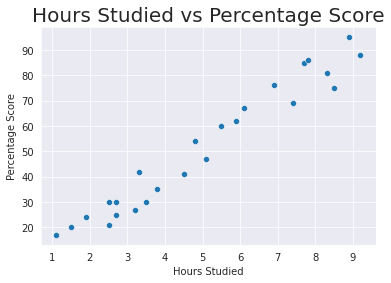

In [8]:

#Visualizing the data
sns.set_style('darkgrid')
sns.scatterplot(y=data['Scores'],x=data['Hours'])
plt.title('Hours Studied vs Percentage Score',size=20)
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.show()

In [ ]:

#From the above graph, we can see a positive linear relation between the hours studied and the percentage obtained(score).

#Training the Model

#1. Preparing the Data

In [9]:
X =data.iloc[:, :-1].values  
y =data.iloc[:, 1].values

In [10]:
#the next step is to split this data into training and test sets.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =train_test_split(X, y,test_size=0.2, random_state=0)

In [11]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 
print("Training complete.")

Training complete.


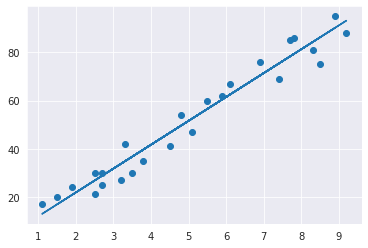

In [12]:

# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

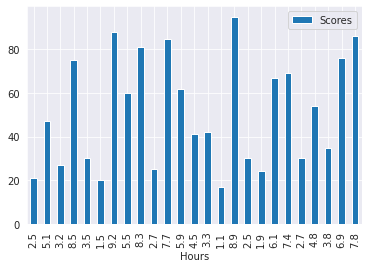

In [13]:
data.plot.bar(x="Hours",y="Scores")

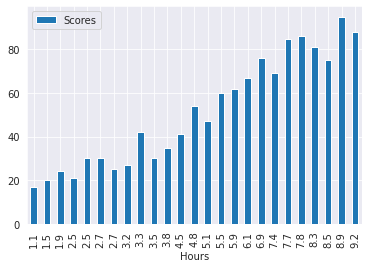

In [14]:

#sorting the data
data.sort_values(["Hours"], axis=0, ascending=[True],inplace=True)

#plotting the data
data.plot.bar(x="Hours",y="Scores")

In [15]:
x = data.iloc[:,:-1].values
y = data.iloc[:,1].values

In [16]:
print(x)

[[1.1]
 [1.5]
 [1.9]
 [2.5]
 [2.5]
 [2.7]
 [2.7]
 [3.2]
 [3.3]
 [3.5]
 [3.8]
 [4.5]
 [4.8]
 [5.1]
 [5.5]
 [5.9]
 [6.1]
 [6.9]
 [7.4]
 [7.7]
 [7.8]
 [8.3]
 [8.5]
 [8.9]
 [9.2]]


In [17]:

#Now , we are dividing the data for training and testing the model
#importing the train_test_split

from sklearn.model_selection import train_test_split

# splitting the data into X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.2,random_state=0)

In [18]:
print(X_train.shape)

(20, 1)


In [19]:
print(X_test.shape)

(5, 1)


In [20]:
print(y_train.shape)


(20,)


In [21]:
print(y_test.shape)

(5,)


In [22]:
#Predicting the % score
print(X_test)
y_pred = regressor.predict(X_test)


[[2.7]
 [1.9]
 [7.7]
 [6.1]
 [4.5]]


In [23]:
#Comparing the result with acutal data
df= pd.DataFrame({'ACTUAL' : y_test, 'PREDICTION' : y_pred})
df

,ACTUAL,PREDICTION
0,30,28.776933
1,24,20.848407
2,85,78.330215
3,67,62.473165
4,41,46.616114


In [24]:

#Custom input(9.25 hours) and the prediction of percentage
hours = [9.25]
own_pred = regressor.predict([hours])
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = [9.25]
Predicted Score = 93.69173248737539


In [25]:
#Evaluating the Model(Accuracy)
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred))

Mean Absolute Error: 4.237478958953777


In [26]:
# importing LinearRegression
from sklearn.linear_model import LinearRegression

#creating an object for LinearRegression
model = LinearRegression()

# fitting the model
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

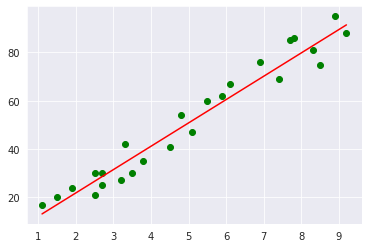

In [27]:
#Fitting The Regression Line
# plotting the regression line
line = model.coef_ * x + model.intercept_

#plotting for test data
plt.scatter(x,y,c="g")
plt.plot(x,line,c="r")
plt.show()

In [28]:
#Making Predictions
# testing the model
y_pred = model.predict(X_test)

#checking accuracy of our model
data = pd.DataFrame({"Actual" : y_test,"Predicted":y_pred})
print(data)

   Actual  Predicted
0      30  28.617714
1      24  20.888033
2      85  76.928222
3      67  61.468859
4      41  46.009497


In [29]:
#Evaluating the model
from sklearn import metrics as mts

#mean abolute error
mean_abs_error = mts.mean_absolute_error(y_test,y_pred)

print("Mean Absolute Error : ",mean_abs_error)

Mean Absolute Error :  4.621333622532767
